<a href="https://colab.research.google.com/github/SobiaNoorAI/Data-Seekho-Data-Science-Mastery-Program/blob/main/Module%202%3A%20STATISTICS%20AND%20DATA%20HANDLING/Project%20E-commerce%20Sales%20Analysis%20with%20SQL%2C%20Pandas%2C%20Matplotlib%2C%20SeabornE_commerce_Sales_Analysis_with_SQL%2C_Pandas%2C_Matplotlib%2C_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce Sales Analysis with SQL, Pandas, Matplotlib, Seaborn

# 1. Import Dataset

In [1]:
  #Import Libraries
  import sqlite3
  import pandas as pd
  #connect database
  conn = sqlite3.connect('database.db')
  cursor = conn.cursor()

  # Load CSV datasets
  orders = pd.read_csv('https://raw.githubusercontent.com/SobiaNoorAI/Python/main/Ecommerce%20Sales%20Analysis/data/Orders_Large.csv')
  products = pd.read_csv('https://raw.githubusercontent.com/SobiaNoorAI/Python/main/Ecommerce%20Sales%20Analysis/data/Products_Large.csv')
  customers = pd.read_csv('https://raw.githubusercontent.com/SobiaNoorAI/Python/main/Ecommerce%20Sales%20Analysis/data/Customers_Large.csv')
  sales = pd.read_csv('https://raw.githubusercontent.com/SobiaNoorAI/Python/main/Ecommerce%20Sales%20Analysis/data/Sales_Large.csv')

  # Write data into database tables
  orders.to_sql('orders_large', conn, if_exists='replace', index=False)
  products.to_sql('products_large', conn, if_exists='replace', index=False)
  customers.to_sql('customers_large', conn, if_exists='replace', index=False)
  sales.to_sql('sales_large', conn, if_exists='replace', index=False)

  print("Database created and populated successfully.")

Database created and populated successfully.


Verify Table Working

In [ ]:
orders=pd.read_sql("select * from orders_large",conn)
print(orders.head())

   TransactionID   OrderDate  CustomerID  ProductID  Quantity  TotalAmount
0           1000  2023-02-11           6        212         4          426
1           1001  2024-06-09          22        226         8          184
2           1002  2022-12-11          31        231         5          880
3           1003  2022-12-18          23        227        10          928
4           1004  2024-04-11          42        215         7          517


# 2. SQL Tasks

## a) Monthly Sales Revenue

In [2]:
#  Total Sales Revenue by Month
query = """
SELECT strftime('%m', OrderDate) AS Month, SUM(TotalAmount) AS Revenue
FROM orders_large
GROUP BY Month
ORDER BY Month;
"""
monthly_revenue = pd.read_sql_query(query, conn)

#save file
monthly_revenue.to_csv('monthly_revenue.csv', index=False)
print(monthly_revenue)


   Month  Revenue
0     01    23169
1     02    14671
2     03    20446
3     04    21664
4     05    30093
5     06    22289
6     07    24503
7     08    23733
8     09    21824
9     10    20679
10    11    19130
11    12    23476


## b) Top 5 Best Selling Products

In [3]:
# SQL query top 5 selling products
query = """
SELECT
    ProductID,
    SUM(Quantity) AS Total_Quantity
FROM orders_large
GROUP BY ProductID
ORDER BY Total_Quantity DESC
LIMIT 5;
"""

# Execute the query
top_selling_products = pd.read_sql_query(query, conn)

#save file
top_selling_products.to_csv('top_selling_products.csv', index=False)

# Display the top 5 selling products
top_selling_products

,ProductID,Total_Quantity
0,205,99
1,220,96
2,207,88
3,216,84
4,215,81


## c) Revenue Contribution by Customer Segments

In [4]:
# SQL query to calculate revenue contribution by customer segment
query = """
SELECT
    c.Segment,
    SUM(o.TotalAmount) AS TotalRevenue
FROM
    customers_large c
JOIN
    orders_large o ON c.CustomerID = o.CustomerID
GROUP BY
    c.Segment
ORDER BY
    TotalRevenue DESC;
"""

# Execute the query and store the result in a Pandas DataFrame
revenue_by_segment = pd.read_sql_query(query, conn)

#save file
revenue_by_segment.to_csv('revenue_by_segment.csv', index=False)

# Display the revenue contribution by customer segment
revenue_by_segment

,Segment,TotalRevenue
0,Corporate,117980
1,Wholesale,74595
2,Retail,73102


## d) Identify the top regions for sales

In [5]:
# SQL query to identify top regions for sales
query = """
SELECT
    c.Region,
    SUM(o.TotalAmount) AS TotalSales
FROM
    customers_large c
JOIN
    orders_large o ON c.CustomerID = o.CustomerID
GROUP BY
    c.Region
ORDER BY
    TotalSales DESC
"""

# Execute the query and store the result in a Pandas DataFrame
top_regions = pd.read_sql_query(query, conn)

# Display the top regions for sales
print(top_regions)

    Region  TotalSales
0     West       69494
1  Central       66744
2     East       58020
3    North       43118
4    South       28301


# 3. Pandas Tasks

## a) Clean Data

### Handle missing values

In [6]:
orders.isnull()

,TransactionID,OrderDate,CustomerID,ProductID,Quantity,TotalAmount
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
495,False,False,False,False,False,False
496,False,False,False,False,False,False
497,False,False,False,False,False,False
498,False,False,False,False,False,False


In [ ]:
orders.isnull().sum()

,0
TransactionID,0
OrderDate,0
CustomerID,0
ProductID,0
Quantity,0
TotalAmount,0


In [7]:
orders.fillna(0)

,TransactionID,OrderDate,CustomerID,ProductID,Quantity,TotalAmount
0,1000,2023-02-11,6,212,4,426
1,1001,2024-06-09,22,226,8,184
2,1002,2022-12-11,31,231,5,880
3,1003,2022-12-18,23,227,10,928
4,1004,2024-04-11,42,215,7,517
...,...,...,...,...,...,...
495,1495,2023-04-16,30,208,8,903
496,1496,2023-03-25,10,230,5,192
497,1497,2024-06-28,11,218,7,288
498,1498,2024-04-06,38,213,6,905


In [ ]:
orders.fillna(0, inplace=True)

In [ ]:
products.isnull().sum()

In [ ]:
products.fillna(0, inplace=True)

In [ ]:
customers.isnull().sum()

In [ ]:
customers.fillna(0, inplace=True)

In [ ]:
sales.isnull().sum()

In [ ]:
sales.fillna(0, inplace=True)

### Remove duplicate rows

In [ ]:
orders.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,False
498,False


In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders.drop_duplicates(inplace=True)

In [ ]:
products.duplicated().sum()

In [ ]:
products.drop_duplicates(inplace=True)

In [ ]:
customers.duplicated().sum()

In [ ]:
customers.drop_duplicates(inplace=True)

In [ ]:
sales.duplicated().sum()

In [ ]:
sales.drop_duplicates(inplace=True)

## b) EDA (Exploratory Data Analysis)

### Sales Trends

In [8]:
# Convert 'OrderDate' to datetime objects if it's not already
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

# Extract the month from the 'OrderDate' column and create a new 'Month' column
orders['Month'] = orders['OrderDate'].dt.month
orders.columns

Index(['TransactionID', 'OrderDate', 'CustomerID', 'ProductID', 'Quantity',
       'TotalAmount', 'Month'],
      dtype='object')

In [9]:
#merge sales and orders Tables
merge_sales_orders = pd.merge(sales, orders, left_on='OrderID', right_on='TransactionID')
merge_sales_orders.head()

,OrderID,Revenue,Discounts,Taxes,TransactionID,OrderDate,CustomerID,ProductID,Quantity,TotalAmount,Month
0,1000,1755,30,65,1000,2023-02-11,6,212,4,426,2
1,1001,1727,76,101,1001,2024-06-09,22,226,8,184,6
2,1002,1834,25,23,1002,2022-12-11,31,231,5,880,12
3,1003,896,94,123,1003,2022-12-18,23,227,10,928,12
4,1004,1868,51,63,1004,2024-04-11,42,215,7,517,4


In [10]:
monthly_sales = merge_sales_orders.groupby('Month')['Revenue'].sum()
print(monthly_sales)

Month
1     47011
2     32035
3     43038
4     45891
5     56438
6     41153
7     58094
8     50186
9     45754
10    50169
11    45717
12    48513
Name: Revenue, dtype: int64


### Customer Behavior

In [11]:
top_customers = merge_sales_orders.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)
print(top_customers.head(5))

CustomerID
3     22198
16    20717
27    18103
34    17155
10    17004
Name: Revenue, dtype: int64


### Product Performance

In [12]:
top_products = merge_sales_orders.groupby('ProductID')['Revenue'].sum().sort_values(ascending=False)
print(top_products.head(5))

ProductID
215    19651
250    19350
221    17570
207    17297
231    16135
Name: Revenue, dtype: int64


## c) Feature Engineering

### Revenue Per Product

Check common columns to merge both tables

In [13]:
orders.columns

Index(['TransactionID', 'OrderDate', 'CustomerID', 'ProductID', 'Quantity',
       'TotalAmount', 'Month'],
      dtype='object')

In [14]:
products.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [15]:
merge_orders_products = pd.merge(orders, products, on='ProductID')
merge_orders_products

,TransactionID,OrderDate,CustomerID,ProductID,Quantity,TotalAmount,Month,ProductName,Category,Price
0,1000,2023-02-11,6,212,4,426,2,Mind,Accessories,67
1,1001,2024-06-09,22,226,8,184,6,Suffer,Accessories,179
2,1002,2022-12-11,31,231,5,880,12,Role,Home Appliances,82
3,1003,2022-12-18,23,227,10,928,12,North,Home Appliances,221
4,1004,2024-04-11,42,215,7,517,4,Both,Accessories,334
...,...,...,...,...,...,...,...,...,...,...
479,1495,2023-04-16,30,208,8,903,4,Explain,Home Appliances,247
480,1496,2023-03-25,10,230,5,192,3,Notice,Books,323
481,1497,2024-06-28,11,218,7,288,6,Answer,Accessories,487
482,1498,2024-04-06,38,213,6,905,4,Guy,Electronics,224


New Column Revenue Per Product

In [16]:
orders['revenue_per_product'] = merge_orders_products['Quantity'] * merge_orders_products['Price']
orders[['revenue_per_product', 'ProductID']].head()

,revenue_per_product,ProductID
0,268.0,212
1,1432.0,226
2,410.0,231
3,2210.0,227
4,2338.0,215


### Customer Lifetime Value

In [17]:
# Calculate average purchase value
average_purchase_value = merge_sales_orders.groupby('CustomerID')['TotalAmount'].mean()

# Calculate purchase frequency
purchase_frequency = merge_sales_orders.groupby('CustomerID')['OrderID'].count() / len(pd.unique(merge_sales_orders['CustomerID']))

# life span of 12 months
customer_lifespan_months = 12

# Calculate CLTV
cltv = average_purchase_value * purchase_frequency * customer_lifespan_months

# Add CLTV to the customers DataFrame
customers['CLTV'] = customers['CustomerID'].map(cltv)

print(customers[['CustomerID', 'CLTV']].head())

   CustomerID     CLTV
0           1  1141.68
1           2  1818.72
2           3  2071.20
3           4   412.56
4           5   918.00


# 4. Basic Visualization Tasks

## a) Visualize monthly sales revenue

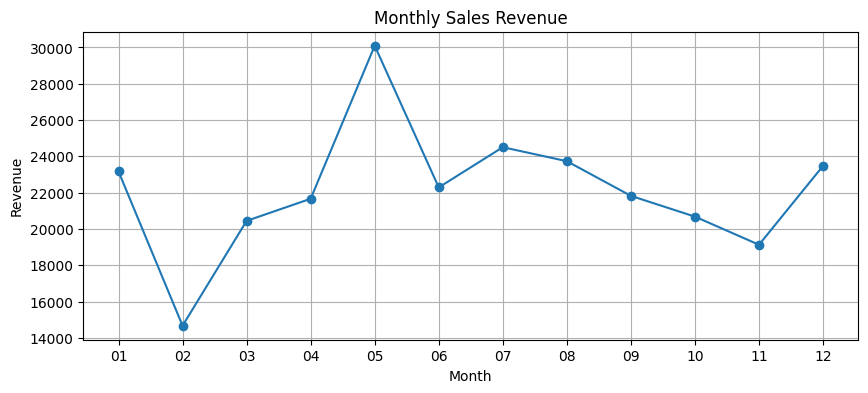

In [18]:
#Visualize monthly sales revenue
#import Library
import matplotlib.pyplot as plt

#graph
plt.figure(figsize=(10, 4))
plt.plot(monthly_revenue['Month'],monthly_revenue['Revenue'], marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales Revenue')
plt.grid(True)
plt.show()

## b) Show the top 5 products by sales quantity

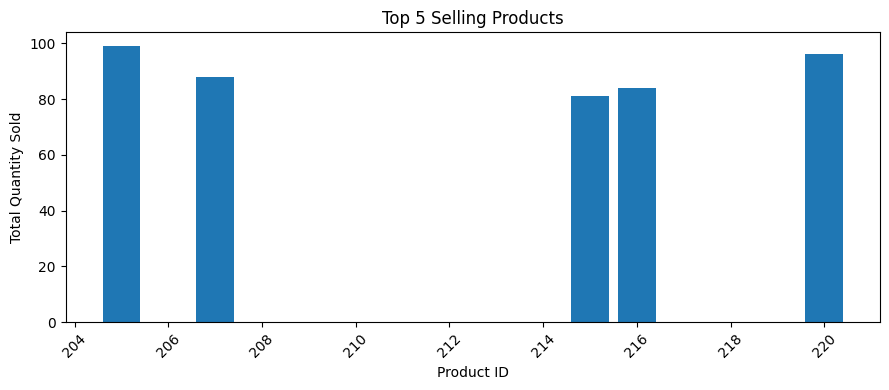

In [19]:
# visualize the top 5 products by sales quantity

plt.figure(figsize=(9, 4))
plt.bar(top_selling_products['ProductID'], top_selling_products['Total_Quantity'])
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.title('Top 5 Selling Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph lacks visual appeal, so we use the Seaborn library to create more attractive and informative visuals

## c) Revenue Contribution by Customer Segments

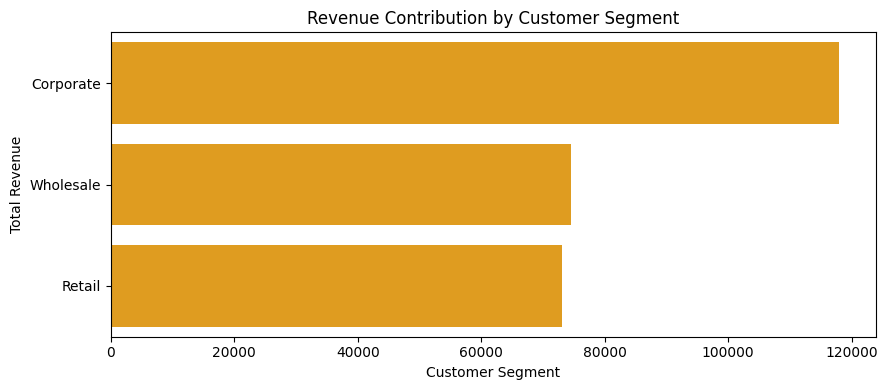

In [20]:
# Visualize revenue contribution by customer segments

import seaborn as sns

plt.figure(figsize=(9, 4))
sns.barplot(y='Segment', x='TotalRevenue', data=revenue_by_segment , color="orange")
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.title('Revenue Contribution by Customer Segment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## d) Revenue Contribution by Customer Regions

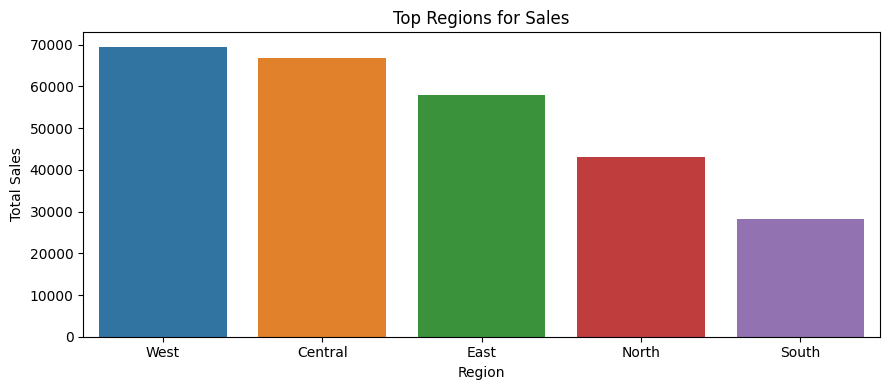

In [21]:
# Visualize revenue contribution by top regions

plt.figure(figsize=(9, 4))
sns.barplot(x='Region', y='TotalSales', data=top_regions , hue='Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Top Regions for Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## e) Discount by Month

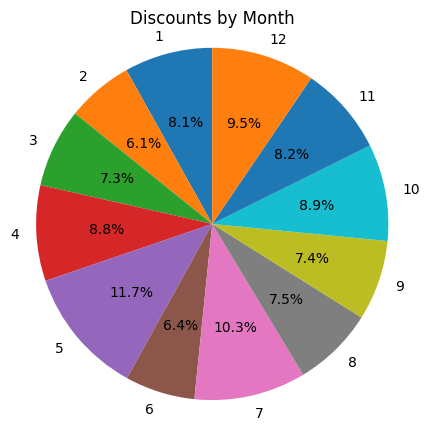

In [22]:
# visualize discounts by Month

# Group data by region and sum discounts
discount_by_month = merge_sales_orders.groupby('Month')['Discounts'].sum()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(discount_by_month, labels=discount_by_month.index, autopct='%1.1f%%', startangle=90)
plt.title('Discounts by Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## f) Total Amount by Customer Segment

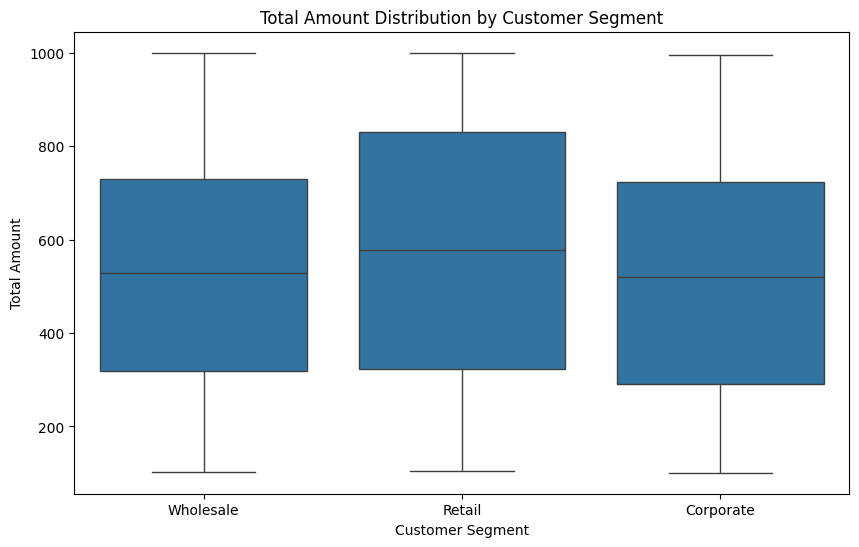

In [23]:
# Box plot of TotalAmount by Customer Segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='TotalAmount', data=pd.merge(orders, customers, on='CustomerID'))
plt.title('Total Amount Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.show()

## f) Distribution of Total Amount or Orders

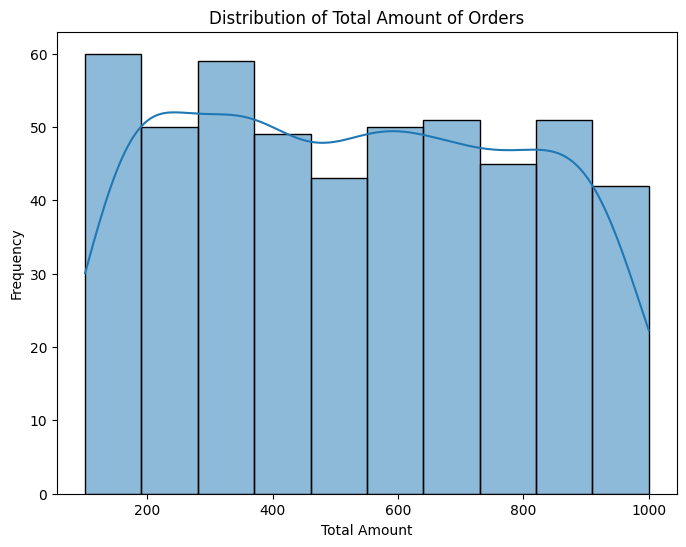

In [ ]:
# Distribution of TotalAmount
plt.figure(figsize=(8, 6))
sns.histplot(orders['TotalAmount'], kde=True)
plt.title('Distribution of Total Amount of Orders')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()